# Analysis of Facebook data to indetify change in content strategy

Provided dataset should answer these 3 questions:

1. How was the **content strategy of Vice on Facebook changed** over time?

2. Does all types of engagement (reactions on FB post: **love, wow, sad, angry** etc.) appear equally often **on very popular vs. not so popular posts?**

3. What **word combinations** appear on very **popular posts vs. not so popular posts?**

The data are available for period from 26/05/2018 till 25/05/2021, so 3 years.

### Table of contents

- Data Wrangling
- 1) How did content strategy changed over time?

    - 1.1 Change in number of posts published
    - 1.2 Change in length of videos
    - 1.3 Change in video share status
    - 1.4 Change in sponsorship
    - 1.5 Change in total views
    - 1.6 Summary of findings

- 2) FB reactions on popular and unpopular posts

    - 2.1 Correlation of total views and different FB reactions
    - 2.2 Ratio of different FB reactions on popular vs unpopular posts
    - 2.3 Summary of findings
    
- 3) The most common words or word combination in popular vs. unpopular posts
    - 3.1 Summary of findings

## Data wrangling and cleaning

In [1]:
# importing standard Python libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# I would like to see all rows and columns of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# do not show warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# looking at provided dataset
vice = pd.read_csv('vice_data.csv', sep=',', encoding='utf-8')
vice.head()

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category
0,VICE News,vicenews,2.360000e+14,MEDIA_NEWS_COMPANY,US,VICE News Tonight airs Monday–Thursday at 11 P...,2014-02-23 19:00:02 EST,3339049,4342864.0,2021-05-26 04:00:18 EDT,Native Video,54,34,4,8,6,2,0,0,0,0,crosspost,Yes,3213,3214,1793907,0:17:38,https://www.facebook.com/235852889908002/posts...,Tattoos are stigmatized in Japan because they'...,https://www.facebook.com/vicenews/videos/81709...,NaN,NaN,Inside the Underground Pilgrimage That Celebra...,NaN,NaN,NaN,NaN
1,VICE News,vicenews,2.360000e+14,MEDIA_NEWS_COMPANY,US,VICE News Tonight airs Monday–Thursday at 11 P...,2014-02-23 19:00:02 EST,3339049,4342864.0,2021-05-26 00:00:35 EDT,Native Video,41,23,5,8,1,0,2,1,1,0,crosspost,No,1745,1752,13838,0:09:21,https://www.facebook.com/235852889908002/posts...,Battle lines are currently being drawn between...,https://www.facebook.com/vicenews/videos/49396...,NaN,NaN,Going Green With Lithium Has Environmentalists...,NaN,NaN,NaN,NaN
2,VICE,VICE,1.670000e+14,MEDIA_NEWS_COMPANY,US,Original reporting on everything that matters.,2012-12-21 17:19:49 EST,8312112,9754669.0,2021-05-25 21:30:50 EDT,Native Video,66,19,5,8,6,0,3,22,1,2,crosspost,No,7268,7273,81146,0:24:57,https://www.facebook.com/167115176655082/posts...,"""I cried for that man just like I cried for my...",https://www.facebook.com/VICE/videos/492230488...,NaN,NaN,Philando Castile's Mother Cried for George Flo...,NaN,NaN,NaN,NaN
3,VICE News,vicenews,2.360000e+14,MEDIA_NEWS_COMPANY,US,VICE News Tonight airs Monday–Thursday at 11 P...,2014-02-23 19:00:02 EST,3339023,4341874.0,2021-05-25 16:22:09 EDT,Native Video,351,77,126,60,5,8,19,3,52,1,crosspost,No,8294,8375,10240,0:05:01,https://www.facebook.com/235852889908002/posts...,A new law in Oklahoma will punish protestors w...,https://www.facebook.com/vicenews/videos/17535...,NaN,NaN,Oklahoma Just Made It Easier to Run Over Prote...,NaN,NaN,NaN,NaN
4,VICE,VICE,1.670000e+14,MEDIA_NEWS_COMPANY,US,Original reporting on everything that matters.,2012-12-21 17:19:49 EST,8312397,9754711.0,2021-05-25 16:00:11 EDT,Native Video,24,12,6,1,0,0,2,0,0,3,crosspost,No,2761,2761,129914,0:03:48,https://www.facebook.com/167115176655082/posts...,"""Every protest has not been one of anger. A lo...",https://www.facebook.com/VICE/videos/398570073...,NaN,NaN,What It Was Like Photographing the George Floy...,NaN,NaN,NaN,NaN


In [4]:
# checking data types and null values
vice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18497 entries, 0 to 18496
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Page Name                       18497 non-null  object 
 1   User Name                       18497 non-null  object 
 2   Facebook Id                     18497 non-null  float64
 3   Page Category                   18497 non-null  object 
 4   Page Admin Top Country          18497 non-null  object 
 5   Page Description                18497 non-null  object 
 6   Page Created                    18497 non-null  object 
 7   Likes at Posting                18497 non-null  int64  
 8   Followers at Posting            18396 non-null  float64
 9   Post Created                    18497 non-null  object 
 10  Type                            18497 non-null  object 
 11  Total Interactions              18497 non-null  object 
 12  Likes                           

In [5]:
# changes for easier handling of columns
vice.columns = vice.columns.str.lower()
vice.drop(['image text'], axis=1, inplace=True)
vice.columns = vice.columns.str.replace(' ', '_')
vice.columns

Index(['page_name', 'user_name', 'facebook_id', 'page_category',
       'page_admin_top_country', 'page_description', 'page_created',
       'likes_at_posting', 'followers_at_posting', 'post_created', 'type',
       'total_interactions', 'likes', 'comments', 'shares', 'love', 'wow',
       'haha', 'sad', 'angry', 'care', 'video_share_status', 'is_video_owner?',
       'post_views', 'total_views', 'total_views_for_all_crossposts',
       'video_length', 'url', 'message', 'link', 'final_link', 'link_text',
       'description', 'sponsor_id', 'sponsor_name', 'sponsor_category'],
      dtype='object')

In [6]:
# Data exploration of variables
vice.page_name.value_counts()

VICE News    8384
VICE         6649
VICE TV      3464
Name: page_name, dtype: int64

In [7]:
vice.user_name.value_counts()

vicenews    8384
VICE        5317
vicetv      3464
viceuk      1332
Name: user_name, dtype: int64

In [8]:
vice.facebook_id.value_counts()

2.360000e+14    8384
1.670000e+14    5317
1.010000e+14    3464
1.500000e+15    1332
Name: facebook_id, dtype: int64

This variable is basically the same as user_name, so it is redundant and therefore can be removed from dataset.

In [9]:
# deleting useless variable
vice.drop(['facebook_id'], axis=1, inplace=True)

In [10]:
# How many different video posts are in dataset?
vice.url.nunique()

18497

In [11]:
vice.page_category.value_counts()

MEDIA_NEWS_COMPANY    15033
TV_CHANNEL             3464
Name: page_category, dtype: int64

In [12]:
vice.page_admin_top_country.value_counts()

US    18497
Name: page_admin_top_country, dtype: int64

In [13]:
# deleting useless variable cause all values are the same (US)
vice.drop(['page_admin_top_country'], axis=1, inplace=True)

In [14]:
vice.page_description.value_counts()

VICE News Tonight airs Monday–Thursday at 11 PM on VICE TV / Call us: 1-888-317-VICE    8384
Original reporting on everything that matters.                                          5317
The TV channel from VICE\n(646) 851-0347                                                3464
The manifold wonders of Old Blighty.                                                    1332
Name: page_description, dtype: int64

In [15]:
# deleting useless variable
vice.drop(['page_description'], axis=1, inplace=True)

In [16]:
vice.type.value_counts()

Native Video            18314
Live Video Complete       156
Live Video Scheduled       26
Live Video                  1
Name: type, dtype: int64

In [17]:
vice.video_share_status.value_counts()

crosspost    15952
owned         2439
share           80
Name: video_share_status, dtype: int64

In [18]:
# previous variable as percentage shares of total posts
vice.video_share_status.value_counts()/len(vice.video_share_status)*100

crosspost    86.241012
owned        13.185922
share         0.432503
Name: video_share_status, dtype: float64

In [19]:
vice["is_video_owner?"].value_counts()

No     10714
Yes     7303
-        480
Name: is_video_owner?, dtype: int64

In [20]:
vice.rename(columns={'is_video_owner?': 'is_video_owner'}, inplace=True)

In [21]:
vice.sponsor_name.value_counts().head(15)

Cadillac                      46
Golden Road Brewing           18
Harley-Davidson               13
Mailchimp                     13
adidas Originals              12
Love GREAT Britain            10
Vans                           9
Lumix UK                       8
Amazon Prime Video             7
Acura                          6
W Hotels Worldwide             5
Levi's                         4
Durex                          4
SweetWater Brewing Company     3
Nike                           3
Name: sponsor_name, dtype: int64

In [22]:
# How big share of posts is not sponsored?
(vice.sponsor_name.isnull().sum())/len(vice.sponsor_name)*100

98.9133372979402

In [23]:
vice.sponsor_id.value_counts().head(15)

9.569077e+10    46
1.170000e+14    18
2.006088e+10    13
4.392927e+10    13
9.328459e+09    11
2.110000e+11    10
2.529720e+10     9
9.100000e+14     8
3.371345e+10     7
8.529929e+10     6
1.380763e+10     5
9.518180e+10     4
1.320000e+14     4
8.313399e+09     3
1.508702e+10     3
Name: sponsor_id, dtype: int64

In [24]:
# deleting useless variable
vice.drop(['sponsor_id'], axis=1, inplace=True)

In [25]:
vice.sponsor_category.value_counts().head(15)

CAR                        52
BREWERY                    21
SOFTWARE                   15
TOPIC_SHOPPING_RETAIL      13
MOTORCYCLE_MANUFACTURER    13
CLOTHING                   13
TOURIST_INFORMATION        10
CAMERA_PHOTO                8
MEDIA_NEWS_COMPANY          8
MOVIE                       5
BRAND                       5
TV_SHOW                     4
MEDICAL_HEALTH              4
PRODUCT_SERVICE             4
SPORTSWEAR_STORE            3
Name: sponsor_category, dtype: int64

In [26]:
min(vice.post_created), max(vice.post_created)

('2018-05-26 12:00:00 EDT', '2021-05-26 04:00:18 EDT')

In [27]:
# creating additional time variables when we need to regroup data by month, year, hour etc.
vice["year"] = (vice['post_created'].str[:4]).astype(int)
vice.post_created = pd.to_datetime(vice.post_created)
vice["week_day"] = (vice.post_created).dt.day_name()
vice['month'] = (vice.post_created).dt.month
vice['hour'] = (vice.post_created).dt.hour
vice['month_year'] = vice['post_created'].dt.to_period('M')

In [28]:
# creating new variable period because years in dataset don't have same number od days
end_period_1 = min(vice.post_created) + dt.timedelta(days=365)
end_period_2 = end_period_1 + dt.timedelta(days=365)
end_period_3 = end_period_2 + dt.timedelta(days=365)

In dataset posts for 3 years are present, but not in form of full year (from January to December), but from May till May next year, so I decided to create variable period that can compare 3 equally long periods instead of years.

In [29]:
# checking the result
end_period_1, end_period_2, end_period_3

(Timestamp('2019-05-26 12:00:00'),
 Timestamp('2020-05-25 12:00:00'),
 Timestamp('2021-05-25 12:00:00'))

In [30]:
vice['period'] = vice.post_created.apply(lambda x: "period_1" if x <= end_period_1
                                     else "period_3" if x > end_period_2
                                     else "period_2")

In [31]:
# When days of week does Vice posts on FB the most frequently?
vice.week_day.value_counts()

Thursday     2925
Wednesday    2877
Tuesday      2740
Monday       2696
Friday       2645
Saturday     2359
Sunday       2255
Name: week_day, dtype: int64

In [32]:
# When months of year does Vice posts on FB the most frequently?
vice.month.value_counts()

11    1750
12    1643
8     1584
1     1574
5     1530
3     1530
10    1525
7     1502
2     1477
4     1463
9     1461
6     1458
Name: month, dtype: int64

In [33]:
# What hour of day does Vice ussually posts on Facebook?
vice.hour.value_counts()

12    1759
21    1423
16    1389
15    1310
18    1240
14    1220
20    1134
0     1062
8     1041
7      988
13     757
19     713
4      710
17     581
9      522
22     463
10     443
11     394
23     386
6      268
2      249
3      156
1      152
5      137
Name: hour, dtype: int64

In [34]:
vice.video_length.value_counts().head(20)

0:00:30    588
0:01:00    465
0:00:20    267
0:00:15    115
0:00:01    112
0:03:30    109
0:00:59     96
0:03:21     75
0:03:03     75
0:03:08     74
0:03:01     73
0:03:06     72
0:03:19     72
0:05:57     71
0:03:18     70
0:05:35     70
0:04:12     68
0:03:00     68
0:05:11     65
0:00:02     65
Name: video_length, dtype: int64

In [35]:
# correcting some wrong values in variable video length
vice.video_length = vice.video_length.fillna("00:00:00")
vice.video_length = vice.video_length.str.zfill(8)
vice[vice.video_length=="336:00:00"]

,page_name,user_name,page_category,page_created,likes_at_posting,followers_at_posting,post_created,type,total_interactions,likes,comments,shares,love,wow,haha,sad,angry,care,video_share_status,is_video_owner,post_views,total_views,total_views_for_all_crossposts,video_length,url,message,link,final_link,link_text,description,sponsor_name,sponsor_category,year,week_day,month,hour,month_year,period
5746,VICE,VICE,MEDIA_NEWS_COMPANY,2012-12-21 17:19:49 EST,8337192,8814305.0,2020-04-07 10:56:40,Live Video,72,38,15,10,5,2,1,0,1,0,crosspost,No,136,157,157,336:00:00,https://www.facebook.com/167115176655082/posts...,NaN,https://www.facebook.com/VICE/videos/544874796...,https://www.facebook.com/login/?next=https%3A%...,Noisey Night In,NaN,NaN,NaN,2020,Tuesday,4,10,2020-04,period_2


In [36]:
vice.loc[vice['video_length']=='336:00:00', 'video_length']='00:03:36'
# changing data type of video length and checking all changes on the variable
vice.video_length = pd.to_timedelta(vice.video_length, errors='coerce')
vice.video_length.head()

0   0 days 00:17:38
1   0 days 00:09:21
2   0 days 00:24:57
3   0 days 00:05:01
4   0 days 00:03:48
Name: video_length, dtype: timedelta64[ns]

In [37]:
# checking min and max video length
min(vice.video_length), max(vice.video_length)

(Timedelta('0 days 00:00:00'), Timedelta('0 days 08:00:13'))

In [38]:
# new variable for better visualization of video length
vice["video_sec"] = vice.video_length.astype('timedelta64[s]')
vice["video_min"] = vice.video_length.astype('timedelta64[m]')

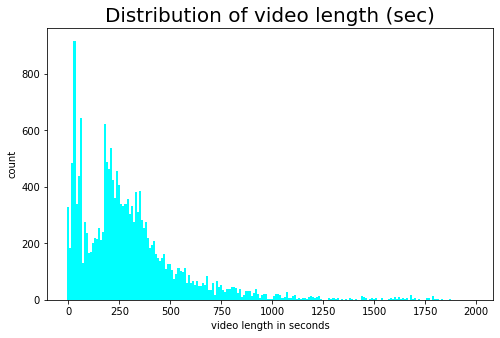

In [39]:
# checking distribution of video length in seconds (without outliers)

bins = np.arange(vice["video_sec"].min(), 2000, 10)

plt.figure(figsize=(8, 5))
plt.hist(data=vice, x="video_sec", bins=bins, facecolor = 'cyan', align='left')
plt.title("Distribution of video length (sec)", fontsize=20)
plt.xlabel("video length in seconds")
plt.ylabel("count")
plt.show()

Let's look on video length in minutes, it will probably paint more clear picture of distribution of video length. So far we can see that the vast majority of posts has shorter videos up to 300-400 secondes, while videos longer than 750 seconds are very rare.

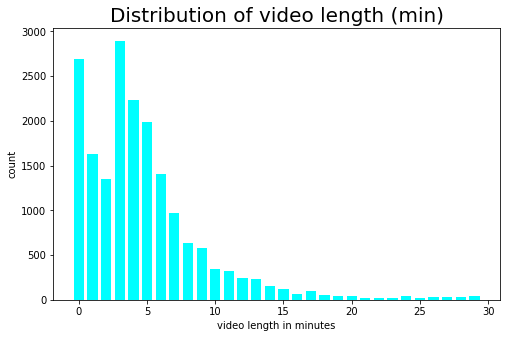

In [40]:
# checking distribution of video lengths in minutes (without outliers)

bins = np.arange(vice["video_min"].min(), 30+1, 1)

plt.figure(figsize=(8, 5))
plt.hist(data=vice, x="video_min", bins=bins, facecolor = 'cyan', align='left', rwidth=0.75)
plt.title("Distribution of video length (min)", fontsize=20)
plt.xlabel("video length in minutes")
plt.ylabel("count")
plt.show()

Here we can see that most of videos are not longer than 6 minutes, while there is many videos with length around 3 minutes and also many videos shorter than 1 minute.

In [41]:
# median and average length of videos in minutes
vice.video_min.median(), vice.video_min.mean()

(4.0, 5.618154295291128)

### Summary of Vice's content strategy as whole (time is not taken into account)

Here are key points of the content strategy before digging deep into changes over time.
- The vast majority of posts on Vice FB pages are reposted (86 % of total) and only small number of post are original (13 %).
- On average posts are usually published on Thursdays, Wednesdays and Tuesdays, the most often after 12:00, from 14:00 till 16:59 and from 20:00 till 21:59.
- During the year the most posts are published in November and December.
- Only 1 % of all posts were sponsored. The main sponsors came from car industry. It was mostly posts sponsored by Cadillac company.
- Majority of the video length is around 3 minutes or less than 1 minute. Median value of video length is 4 minutes, average is 5,6 minutes.

## 1) How did content strategy changed over time?

### 1.1 Change in number of posts published

In [42]:
vice.year.value_counts()

2019    7192
2020    5350
2018    3874
2021    2081
Name: year, dtype: int64

In [43]:
vice.period.value_counts()

period_2    6819
period_1    6647
period_3    5031
Name: period, dtype: int64

We can observe **decrease of number of posts in last period**.

### 1.2 Change in length of videos

In [44]:
(vice.groupby(['period'])['video_min'].mean().to_frame(name = 'avg_video_length').reset_index())

,period,avg_video_length
0,period_1,4.564465
1,period_2,5.671946
2,period_3,6.937388


There is gradual increase of average video length over time from 5 minutes in first period to 7 minutes in last period. But because of outliers it is better to look on median values.

In [45]:
(vice.groupby(['period'])['video_min'].median().to_frame(name = 'median_video_length').reset_index())

,period,median_video_length
0,period_1,3.0
1,period_2,4.0
2,period_3,5.0


We verified even on median video length values that trend of increasing video length over time is visible.

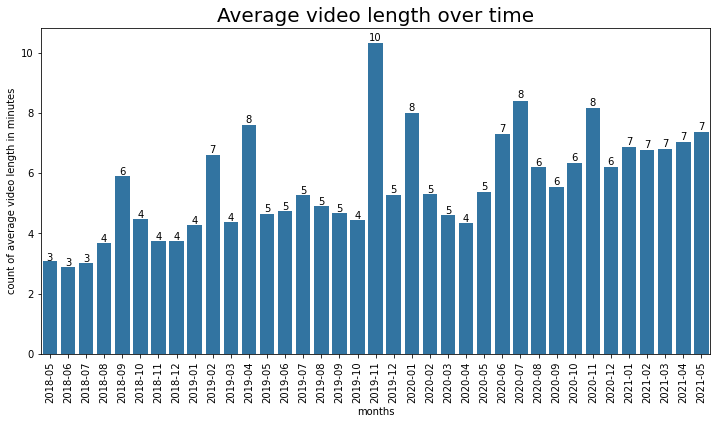

In [46]:
base_color = sns.color_palette()[0]
video_min_g = (vice.groupby(['month_year'])['video_min'].mean().to_frame(name = 'avg_video_length_min').reset_index())

plt.figure(figsize=(12,6))

ax = sns.barplot(data=video_min_g, x='month_year', y='avg_video_length_min', color=base_color)

plt.title('Average video length over time', fontsize=20)
plt.xlabel('months')
plt.ylabel('count of average video length in minutes')
plt.xticks(rotation=90)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center");

When excluding some outlier months like 11/2019, we can see **trend of longer of videos over time**.

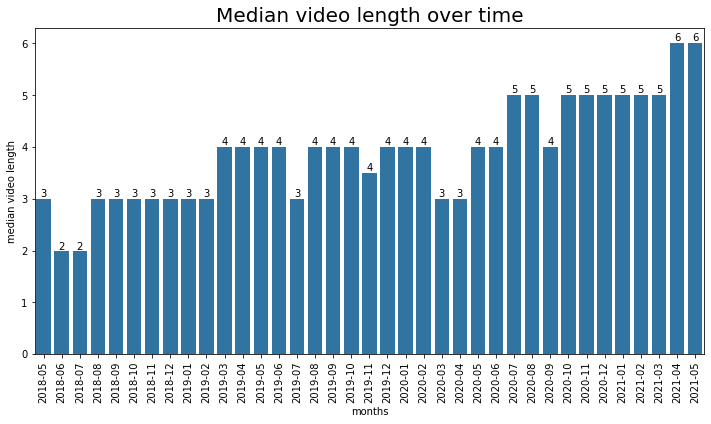

In [47]:
base_color = sns.color_palette()[0]
video_min_g = (vice.groupby(['month_year'])['video_min'].median().to_frame(name = 'median_video_length_min').reset_index())

plt.figure(figsize=(12,6))

ax = sns.barplot(data=video_min_g, x='month_year', y='median_video_length_min', color=base_color)

plt.title('Median video length over time', fontsize=20)
plt.xlabel('months')
plt.ylabel('median video length')
plt.xticks(rotation=90)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center");

The increase of video length is even more visible when looking on median values.

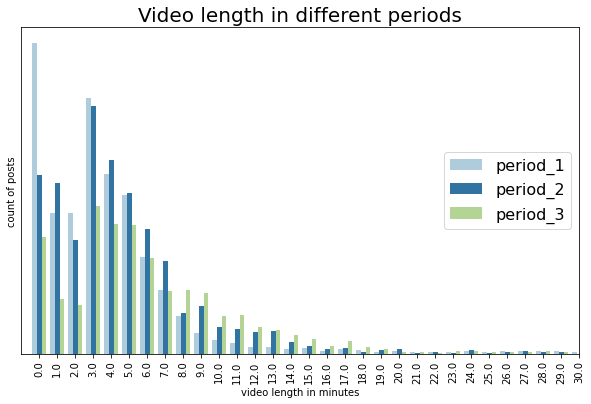

In [48]:
base_color = sns.set_palette("Paired")

# plot delays by day of week
plt.figure(figsize=(10,6))
ax = sns.countplot(data=vice, x='video_min', hue='period', color=base_color, hue_order = ['period_1', 'period_2', 'period_3'])
# hide y axis values https://stackoverflow.com/questions/24497172/remove-yaxis-values-from-facetgrid-in-seaborn
ax.set(yticks=[])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Video length in different periods', fontsize=20)
plt.xlabel('video length in minutes')
plt.ylabel('count of posts')
plt.xlim(-1, 30)

l = plt.legend(loc='center right', fontsize=16)
l.get_texts()[0].set_text('period_1')
l.get_texts()[1].set_text('period_2')
l.get_texts()[2].set_text('period_3')

On the graph above we can see that videos shorter than 1 minute are most common in first period. Also longer videos from 8 to 12 minutes are published more often in period_3. This finding is in line with previous finding that over time videos get longer.

### 1.3 Change in video share status

In [49]:
(vice.groupby(['period', 'video_share_status'])['url'].size().to_frame(name = 'count').reset_index().sort_values(by=['count'], ascending=False)).head(15)

,period,video_share_status,count
3,period_2,crosspost,6273
0,period_1,crosspost,5367
6,period_3,crosspost,4312
1,period_1,owned,1211
7,period_3,owned,693
4,period_2,owned,535
2,period_1,share,69
5,period_2,share,8
8,period_3,share,3


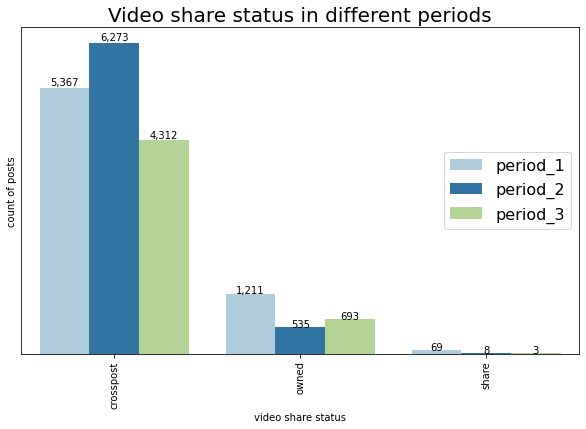

In [50]:
base_color = sns.set_palette("Paired")
hue_order = ['period_1', 'period_2', 'period_3']

# plot delays by day of week
plt.figure(figsize=(10,6))
ax = sns.countplot(data=vice, x='video_share_status', hue='period', color=base_color, hue_order = hue_order)
# hide y axis values https://stackoverflow.com/questions/24497172/remove-yaxis-values-from-facetgrid-in-seaborn
ax.set(yticks=[])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Video share status in different periods', fontsize=20)
plt.xlabel('video share status')
plt.ylabel('count of posts')

l = plt.legend(loc='center right', fontsize=16)
l.get_texts()[0].set_text('period_1')
l.get_texts()[1].set_text('period_2')
l.get_texts()[2].set_text('period_3')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center")

In [51]:
status_g = (vice.groupby(['month_year', 'video_share_status'])['video_share_status'].count().to_frame(name = 'count').reset_index())

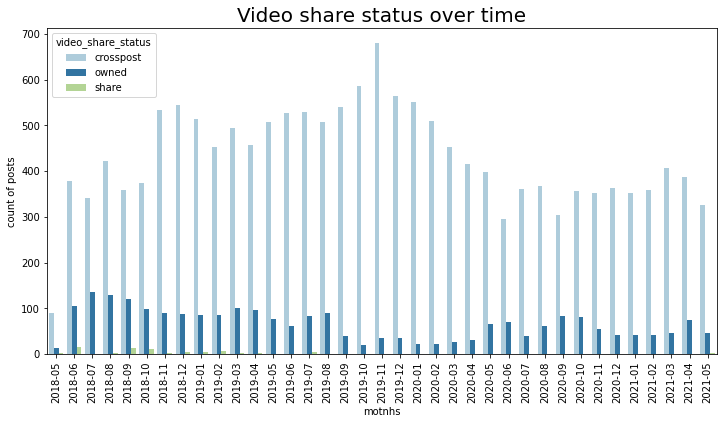

In [52]:
# plot results
plt.figure(figsize=(12,6))

ax = sns.barplot(data=status_g, x='month_year', y='count', hue='video_share_status')

plt.title('Video share status over time', fontsize=20)
plt.xlabel('motnhs')
plt.ylabel('count of posts')
plt.xticks(rotation=90);

From period_1 to period_2 there is increase of number of crosspots (by 17 %) and decrease in number of original posts (by 66 %). Trends change from period_2 to period_3. In other words number of crossposts decrease (by 31 %) and number of original posts increase (by 30 %).

### 1.4 Change of sponsorship over time

In [53]:
vice.sponsor_name = vice.sponsor_name.fillna("no sponsor")

In [54]:
(vice.groupby(['period', 'sponsor_name'])['url'].size().to_frame(name = 'count').reset_index().sort_values(by=['count'], ascending=False)).head(15)

,period,sponsor_name,count
44,period_2,no sponsor,6767
20,period_1,no sponsor,6520
54,period_3,no sponsor,5009
3,period_1,Cadillac,46
5,period_1,Golden Road Brewing,18
8,period_1,Love GREAT Britain,10
18,period_1,adidas Originals,9
9,period_1,Lumix UK,8
26,period_2,Harley-Davidson,8
32,period_2,Mailchimp,7


In [55]:
vice["sponsor_yes_no"] = np.where(vice['sponsor_name']=="no sponsor", "no sponsor", "sponsor")

In [56]:
(vice.groupby(['period', 'sponsor_yes_no'])['url'].size().to_frame(name = 'count').reset_index().sort_values(by=['count'], ascending=False)).head(15)

,period,sponsor_yes_no,count
2,period_2,no sponsor,6767
0,period_1,no sponsor,6520
4,period_3,no sponsor,5009
1,period_1,sponsor,127
3,period_2,sponsor,52
5,period_3,sponsor,22


Total number of sponsored posts decrease over time, but when looking on percentage of shared posts from total, it is still similar 0,4 % to 2 %. So basically, share of **sponsored posts remains negligible over time**.

### 1.5 Change in Total views over time

In [57]:
(vice.groupby(['period'])['total_views'].mean().to_frame(name = 'avg_total_views').reset_index())

,period,avg_total_views
0,period_1,188452.378366
1,period_2,325030.415897
2,period_3,370208.363546


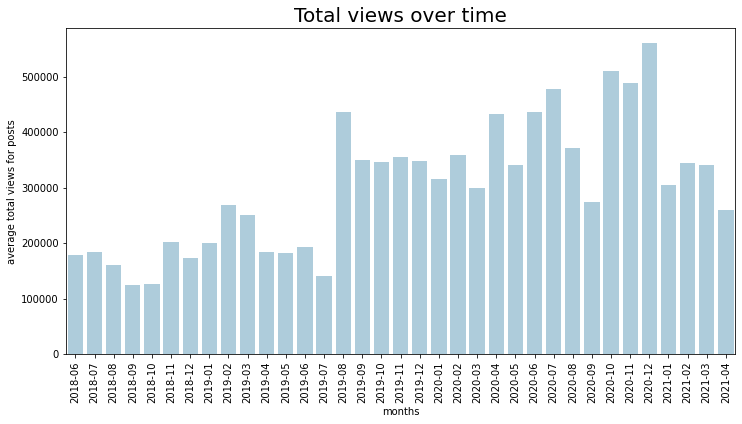

In [58]:
base_color = sns.color_palette()[0]
total_views_g = (vice.groupby(['month_year'])['total_views'].mean().to_frame(name = 'avg_total_views').reset_index())
# removing incomplete months because they are not comparable with complete months
total_views_g = total_views_g[(total_views_g.month_year != "2018-05") & (total_views_g.month_year != "2021-05") ]

plt.figure(figsize=(12,6))

ax = sns.barplot(data=total_views_g, x='month_year', y='avg_total_views', color=base_color)

plt.title('Total views over time', fontsize=20)
plt.xlabel('months')
plt.ylabel('average total views for posts')
plt.xticks(rotation=90);

In general **Total views go up over time**. The most **significant peak happened in august of 2019** and since then total views stayed higher than before. But recently, over first four months of 2021 total views dropped quite a lot from values of end of year 2020, to be more exact **from approx 500 K per month in last 3 months of 2020 drop to 300 K per month in beggining of 2021**.

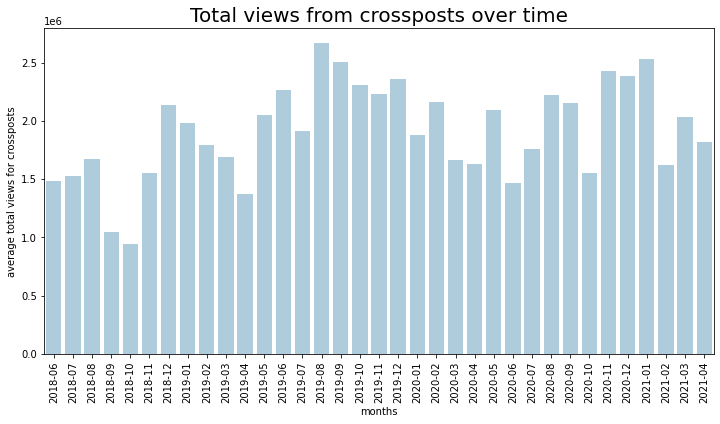

In [59]:
base_color = sns.color_palette()[0]
total_views_g_cross = (vice.groupby(['month_year'])['total_views_for_all_crossposts'].mean().to_frame(name = 'avg_total_views_for_all_crossposts').reset_index())
# removing incomplete months because they are not comparable with complete months
total_views_g_cross = total_views_g_cross[(total_views_g_cross.month_year != "2018-05") & (total_views_g_cross.month_year != "2021-05") ]

plt.figure(figsize=(12,6))

ax = sns.barplot(data=total_views_g_cross, x='month_year', y='avg_total_views_for_all_crossposts', color=base_color)

plt.title('Total views from crossposts over time', fontsize=20)
plt.xlabel('months')
plt.ylabel('average total views for crossposts')
plt.xticks(rotation=90);

Total views from crossposts tends to go up till august 2019 and then they rather decrease over time, even though there is sharp increase from November 2020 till January 2021.

### 1.6 Summary of content strategy shift over 3 years

Three years cover period from 26th may 2018 to 25th may 2021 and are divided into 3 equally long periods.

- decrease of number of posts in last 2 years (6819 posts in second period, but only 5031 posts in last period)
- longer videos (on average from 4,5 minutes in first period to 7 minutes of video in last period)
- decrease of number of crossposts and increase number of original posts in last 2 years
- no  change in share of sponsored posts, they represent only 1 % of all posts. In last period it is even only 0.4 %.
- total views are going up over time, even though there is significant drop in last four months.

## 2) FB reactions on popular and unpopular posts

In [60]:
# total interactions are not in good data type (string instead of numeric)
vice.total_interactions.unique()

array(['54', '41', '66', ..., '3,043', '2,746', '4,151'], dtype=object)

In [61]:
# correction of total interactions variable to integer
vice.total_interactions = vice.total_interactions.str.replace(',',  '')
vice.total_interactions = vice.total_interactions.astype(int)

In [62]:
# quick check of average and median values for FB reactions
pd.set_option('display.float_format', lambda x: '%.0f' % x)
vice.describe()

,likes_at_posting,followers_at_posting,total_interactions,likes,comments,shares,love,wow,haha,sad,angry,care,post_views,total_views,total_views_for_all_crossposts,video_length,year,month,hour,video_sec,video_min
count,18497,18396,18497,18497,18497,18497,18497,18497,18497,18497,18497,18497,18497,18497,18497,18497,18497,18497,18497,18497,18497
mean,4371757,4796464,3230,1253,402,885,173,95,273,103,39,9,228073,288238,1930663,0 days 00:06:05.064280694,2019,7,13,365,6
std,2519810,2604949,22348,7669,2381,7458,1593,1513,4001,1985,427,78,1043348,1561344,6202929,0 days 00:13:41.577386270,1,3,6,822,14
min,156256,165634,0,0,0,0,0,0,0,0,0,0,0,0,0,0 days 00:00:00,2018,1,0,0,0
25%,3059806,3236021,114,48,14,16,2,1,1,0,0,0,15588,16316,51316,0 days 00:02:15,2019,4,8,135,2
50%,3303360,3664807,312,124,56,48,9,4,8,1,1,0,42065,44642,246880,0 days 00:04:15,2019,7,14,255,4
75%,7851159,7647820,1050,390,219,180,36,18,42,10,7,0,122925,135266,1178724,0 days 00:06:42,2020,10,18,402,6
max,8365720,9814491,1436228,328187,184232,474619,102585,165158,388254,151864,34648,3584,42649530,90925150,138309361,0 days 08:00:13,2021,12,23,28813,480


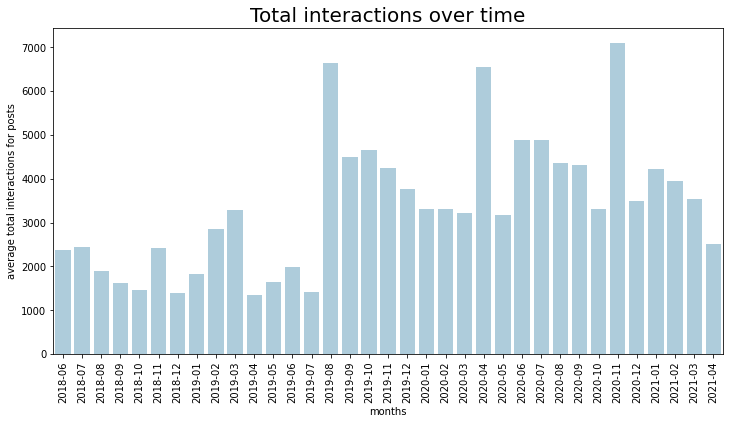

In [63]:
base_color = sns.color_palette()[0]
total_interactions_g = (vice.groupby(['month_year'])['total_interactions'].mean().to_frame(name = 'avg_total_interactions').reset_index())
total_interactions_g = total_interactions_g[(total_interactions_g.month_year != "2018-05") & (total_interactions_g.month_year != "2021-05") ]

plt.figure(figsize=(12,6))

ax = sns.barplot(data=total_interactions_g, x='month_year', y='avg_total_interactions', color=base_color)

plt.title('Total interactions over time', fontsize=20)
plt.xlabel('months')
plt.ylabel('average total interactions for posts')
plt.xticks(rotation=90);

Total interactions copy the developement of Total views over time. They go also up with similar peaks and drops.

### 2.1 Correlation of Total views and different FB reactions

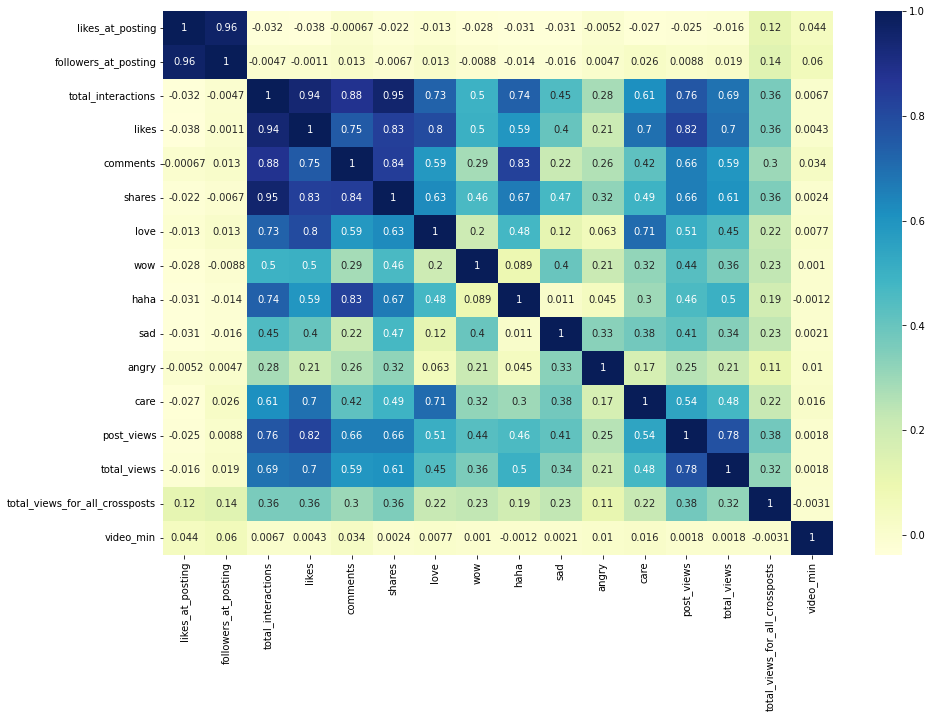

In [64]:
# selecting quantitative variables for correlation
corr_var = vice[['likes_at_posting',
       'followers_at_posting', 'post_created',  'total_interactions',
       'likes', 'comments', 'shares', 'love', 'wow', 'haha', 'sad', 'angry',
       'care',  'post_views',
       'total_views', 'total_views_for_all_crossposts', 'video_min']]

# creating correlation matrice
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_var.corr(), annot=True, ax=ax, cmap="YlGnBu");

Popular post can be defined by high total views or high total interactions. It is not suprising that total views and total interactions are strongly positively correlated with likes, shares and comments. When looking on emotional types of engagement (love, wow, sad, angry etc.), there is **strong positive correlation between haha, love and care engagement and total views**, but the least strong positive correlation between angry and total views. The same is true for correlation with total interactions.

### 2.2 Ratio of different FB reactions on popular vs unpopular posts

In [65]:
# dividing total interactions into 7 new categories based on their number, from totally unpopular with lowest total interaction to totally popular with highest total interactions
vice['score_interaction'] = pd.qcut(vice['total_interactions'], 7,  labels = ['totally not popular', 'not popular', 'less popular', 'medium','more popular','very popular', 'totally popular'])

In [66]:
# calculation ration of ceratin type of engagement on total interactions
pd.options.display.float_format = '{:,.2f}'.format

vice["angry_ratio"] = (vice.angry / vice.total_interactions)*100
vice["love_ratio"] = (vice.love / vice.total_interactions)*100
vice["haha_ratio"] = (vice.haha / vice.total_interactions)*100
vice["wow_ratio"] = (vice.wow / vice.total_interactions)*100
vice["sad_ratio"] = (vice.sad / vice.total_interactions)*100

In [67]:
vice.groupby(['score_interaction'])['haha_ratio'].mean().to_frame(name = 'haha_ratio_avg').reset_index()

,score_interaction,haha_ratio_avg
0,totally not popular,4.86
1,not popular,4.99
2,less popular,5.21
3,medium,5.53
4,more popular,6.29
5,very popular,6.80
6,totally popular,7.26


Here the pattern is quite clear: **More popular post is, more haha reaction it has**.

In [68]:
vice.groupby(['score_interaction'])['angry_ratio'].mean().to_frame(name = 'angry_ratio_avg').reset_index()

,score_interaction,angry_ratio_avg
0,totally not popular,0.66
1,not popular,1.32
2,less popular,1.76
3,medium,2.18
4,more popular,2.22
5,very popular,2.31
6,totally popular,1.69


Angry reaction does appear most often in more popular and very popular posts, but much less on other posts. 

In [69]:
vice.groupby(['score_interaction'])['love_ratio'].mean().to_frame(name = 'love_ratio_avg').reset_index()

,score_interaction,love_ratio_avg
0,totally not popular,4.46
1,not popular,4.38
2,less popular,4.26
3,medium,4.24
4,more popular,4.22
5,very popular,4.39
6,totally popular,5.11


Totally popular posts have more love reaction than other posts.

In [70]:
vice.groupby(['score_interaction'])['wow_ratio'].mean().to_frame(name = 'wow_ratio_avg').reset_index()

,score_interaction,wow_ratio_avg
0,totally not popular,1.53
1,not popular,2.12
2,less popular,2.25
3,medium,2.30
4,more popular,2.29
5,very popular,2.19
6,totally popular,2.44


More or less, we can say that more popular posts hves more wow reaction then less popular.

In [71]:
vice.groupby(['score_interaction'])['sad_ratio'].mean().to_frame(name = 'sad_ratio_avg').reset_index()

,score_interaction,sad_ratio_avg
0,totally not popular,1.71
1,not popular,3.22
2,less popular,3.10
3,medium,3.22
4,more popular,2.90
5,very popular,2.37
6,totally popular,2.25


Sad reaction is more typical for not popular, less popular and medium popular posts.

### 2.3  Summary of FB reactions on popular vs unpopular posts
- Higher popularity of posts (in terms of total interactions), more often haha reaction appears.
- Higher popularity of posts, more often wow reaction appears.
- Sad reaction appears more often on less popular posts (not popular, less popular and medium).
- Love reaction appears more or less similarilly often on all posts with slightly higher ratio of love on totally popular posts.
- Angry reaction does appear less on the best and the worst posts, but more on second, third and fourth best posts (very, more and medium popular in score_interaction)

## 3) The most common words or word combinations in popular vs. unpopular posts

I will use previously created variable total_interactions to divide popular (totaly, very) and unpopular posts (totaly not, not an). Meddium popular posts will be omitted. 

In [72]:
# recoding NaN values to string for later use of WordCloud
vice.message = vice.message.fillna("no data found")
vice.message = vice.message.str.replace(',',  '')
vice.link_text = vice.link_text.fillna("no data found")
vice.link_text = vice.link_text.str.replace(',',  '')

In [73]:
not_pop_text_int = vice[(vice.score_interaction == "totally not popular") | (vice.score_interaction == "not_popular")]
pop_text_int = vice[(vice.score_interaction == "totally popular") | (vice.score_interaction == " very popular")]

In [74]:
# selection of words with no meaning or that can appear on any post without bringing any special information value
stopwords=["https", "no data found", "the", "a", "The", "an",
            "Vice News", "With", "no data", "data found", "data", "found",
            "This", "in", "found no", "I", "of", "What", "Vice", "VICE",
            "and", "How", "to", "on", "no", "News", "Tonight", "LIVE",
            "From", "for", "why", "10p", "11p", "30p", "at 10p", "are", "Up", "9p",
            "Is", "at", "all", "All", "s", "u", 'one', "you", "it", "out", "inside",
            "by", "your, his", "be", "can", "like", "was", "Your", "My", "Here", "Time",
            "Day", "Here", "Get", "Will", "will", "Take", "When", "These", "Got", "as", 
            "that", "Over", "After", "Make", "make", "About", "about", "Really", "His",
            "We", "Now", "Making", "New", "do", "he", "not", "week", "into", "our","there", 
          "www", "who", "have", "but", "into", "their", "her", "com en_us", "com", "en_us",
          "ly", "just", "has", "viceland", "some", "via", "bit", "going", "made", "so", "been",
          "being", "they", "him", "more", "she", "be", "video", "were", "would", "where", "if", 
           "only", "go", "than", "us", "during", "TV", "tv", "http", "around", "went", "become",
          "them", "10PM", "see", "See", "two", "people", "People", "meet", "Meet", "Watch", "watch",
          "look", "Look", "right", "most", "could", "world", "find", "year", "World", "Life", "life",
          "show", "Show", "since", "episode", "Episode", "story", "Story", "took", "Took", "through",
          "down", "back", "had", "old"]

In [75]:
from wordcloud import WordCloud
# before using wordcloud our text must be in a string
not_pop_link = ','.join(not_pop_text_int.link_text)
pop_link = ','.join(pop_text_int.link_text)

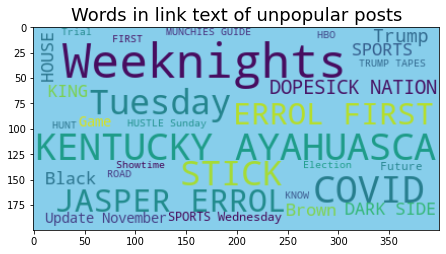

In [76]:
# what words appear on unpopular posts in link text?
wordcloud = WordCloud(max_words=30, stopwords = stopwords, 
                      background_color="skyblue").generate(not_pop_link)
plt.title("Words in link text of unpopular posts", fontsize=18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.show();

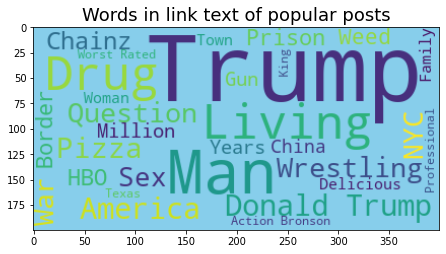

In [77]:
# what words appear on popular posts in link text?
wordcloud = WordCloud(max_words=30, stopwords= stopwords, 
                      background_color="skyblue").generate(pop_link)
plt.title("Words in link text of popular posts", fontsize=18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.show();

In [78]:
not_pop_message = ','.join(not_pop_text_int.message)
pop_message = ','.join(pop_text_int.message)

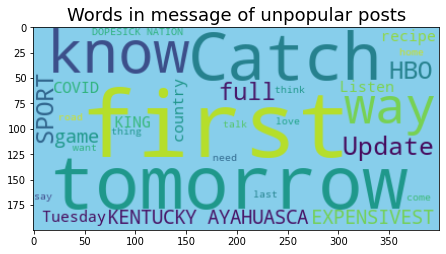

In [79]:
# what words appear on not popular posts in message?
wordcloud = WordCloud(max_words=30, stopwords = stopwords, 
                      background_color="skyblue").generate(not_pop_message)
plt.title("Words in message of unpopular posts", fontsize=18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.show();

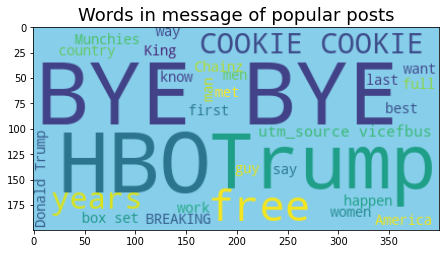

In [80]:
# what words appear on popular posts in message?
wordcloud = WordCloud(max_words=30, stopwords = stopwords, 
                      background_color="skyblue").generate(pop_message)
plt.title("Words in message of popular posts", fontsize=18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.show();

### 3.1 Summary of words on popular vs unpopular posts
- in link text of not popular posts appear these words: Jasper errol, Errol first, Kentucky Ayahuasca, brown, black, Dopesick nation, Tuesday, election, dark side, covid, road, sports, Trump tapes, weeknights
- in link text of popular posts appear these words: pizza, wrestling, Chainz, weed, China, gun, NYC, sex, war, border, question, million, delicious, prison, most expensive, America, million
- in message of not popular posts appear these words: tomorrow, sport, expensivest, Kentucky Ayahusca, Tuesday, game, Dopesick nation, covid, road
- in message of popular posts appear these words: breaking, cookie cookie, free, Munchies, America, bye bye
- words like Trump, Donald Trump or HBO appear on popular and not popular posts also, so no need to take them in consideration.